<a href="https://colab.research.google.com/github/victortello17/victortello17/blob/main/EXAMEN_PARCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VICTOR TELLO MARCA - EXAMEN PARCIAL

#PREGUNTA 1

Considere el problema de lanzamiento en el aire de un balon de masa
$400 gramos$. Asumir para el cuerpo considerado la fuerza de resistencia es
linealmente proporcional a la velocidad $v$ y el coeficiente de proporcionalidad
$k = 0.02 kg/s$. La persona que lanza el balon, desde una altura de $H =
z_0=1.8 m$, tiene el objetivo de alcanzar la canastilla que se encuentra a
una distancia $L = 8 m$ en el eje $x$ y altura de $2.5 m$. Asumiendo que el
 ́angulo inicial $θ_0$ de lanzamiento siempres es $45 grados$, realice el experimento numérico para determinar la velocidad inicial $v_0$ necesaria de tal manera que el balon caiga en la canastilla.

a) (2p) Formule el modelo matemático del sistema para la solución numérica
de las ecuaciones diferenciales que gobierna el movimiento. Defina el
algoritmo de Euler para hallar las coordenadas y velocidades.

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
#vx = v*cos45 y vz= v*sin45

#Modelo matemático
az = lambda vz: g - (k/m)*vz 
ax = lambda vx: -(k/m)*abs(vx) 
#Condiciones
#y >= 0

b) (4p)Escriba un código en Python o Fortran que implementa el el algo-
ritmo de Euler simple para hallar las coordenadas x(ti), z(ti) y veloci-
dades vx(ti), vz(ti) asi como la energ ́ıa mec ́anica total en cada instante de tiempo discreto. El programa debe imprimir en la pantalla una tabla
de datos:

$t_i$   $x_i$   $z_i$   $v_{xi}$   $v_{zi}$   $E_{tot}(t_i)$

In [13]:
def Euler2d(t,x,z,vx,vz):
  """
  Algoritmo de Euler de segundo orden
  r: posición
  v: velocidad
  h: paso
  """
################################################################################
  # Definición de las listas con los valores de las variables
  tiempo = [t]
  posicionx = [x]
  posicionz = [z]
  velocidadx = [vx]
  velocidadz = [vz]
  aceleracionx = [ax(vx)]
  aceleracionz = [az(vz)]

################################################################################
  h = float(input("Ingrese el paso: "))
  #print("tiempo  posiciónx  posiciónz  velocidadx  velocidadz  aceleraciónx  aceleraciónz")
  while z >= 0:
    tiempo.append(t)
    posicionx.append(x)
    posicionz.append(z)
    velocidadx.append(abs(vx))
    velocidadz.append(vz)
    aceleracionx.append(abs(ax(vx)))       
    aceleracionz.append(az(vz))

################################################################################
    #print('{:1.2f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}'.format(t,x,z,vx,vz,ax(vx),az(vz)))    
    z = z + h*vz
    vz = vz + h*az(vz)

    x = x + h*vx
    vx = vx + h*ax(vx)

    t = t + h

  return tiempo,posicionx,posicionz,velocidadx,velocidadz,aceleracionx,aceleracionz

In [14]:
#Valores del sistema físico
m = 0.4  # masa en kg
g = -9.87
k = 0.02

#Condiciones del problema
t = 0

#PVI z(0)=1.8, v(0) = 0
z = 1.8
vz = 6.71
x = 0
vx = 6.71

In [15]:
# solucion numerica con euler
(ts,xs,zs,vxs,vzs,axs,azs) = Euler2d(t,x,z,vx,vz)
#Energía
EK = np.zeros(len(vxs))
ET = np.zeros(len(vxs))
print("Tiempo  Posiciónx  Posiciónz Velocidadx  Velocidadz  Energía T")
for i in range(1,len(vxs)):
  EK[i] = 0.5*m*(vxs[i])**2 + 0.5*m*(vzs[i])**2
  ET[i] = EK[i] + m*abs(g) * zs[i]
  print('{:0.2f}{:10.4f}{:10.4f}{:12.4f}{:12.4f}{:12.4f}'.format(ts[i],xs[i],zs[i],vxs[i],vzs[i],ET[i]))

Ingrese el paso: 0.1
Tiempo  Posiciónx  Posiciónz Velocidadx  Velocidadz  Energía T
0.00    0.0000    1.8000      6.7100      6.7100     25.1160
0.10    0.6710    2.4710      6.6764      5.6894     25.1445
0.20    1.3386    3.0399      6.6431      4.6740     25.1970
0.30    2.0030    3.5073      6.6099      3.6636     25.2695
0.40    2.6639    3.8737      6.5768      2.6583     25.3576
0.50    3.3216    4.1395      6.5439      1.6580     25.4573
0.60    3.9760    4.3053      6.5112      0.6627     25.5645
0.70    4.6271    4.3716      6.4786     -0.3276     25.6752
0.80    5.2750    4.3389      6.4463     -1.3129     25.7854
0.90    5.9196    4.2076      6.4140     -2.2934     25.8913
1.00    6.5610    3.9782      6.3819     -3.2689     25.9890
1.10    7.1992    3.6513      6.3500     -4.2396     26.0749
1.20    7.8342    3.2274      6.3183     -5.2054     26.1450
1.30    8.4660    2.7068      6.2867     -6.1663     26.1959
1.40    9.0947    2.0902      6.2553     -7.1225     26.2238
1

c) (3p) Realice el experimento numérico con paso de tiempo $dt = 0.02$ y
determine el valor de la velocidad inicial $v_0$. Con los datos obtenidos
con la velocidad inicial establecida presente la grafica de la trayectoria
del balon, colocando en el t ́ıtulo su apellido y el valor de $v_0$. Cuanto
tiempo demora el balon en alcanzar el objetivo?. Teniendo en cuenta
el error de cálculo indique la posición del balón cuando se encuentre en
el punto mas alto, así como la energía total.

In [16]:
#solucion numerica con euler para h=0.02
ts1,xs1,zs1,vxs1,vzs1,axs1,azs1 = Euler2d(t,x,z,vx,vz)
#Respondiendo las preguntas y completando la tabla con la energia total
print('la velocidad inicial es de:', np.sqrt(vx**2+vz**2), 'm/s')
print('Segun el cuadro, el tiempo para llegar a la canasta es de:', 1.24, 's' )
print('El punto mas alto es: ', 4.0953, 'm',' y la energia total:', 24.5990, 'J')
print('=================')

#Energía
EK = np.zeros(len(vxs1))
ET = np.zeros(len(vxs1))
print("Tiempo  Posiciónx  Posiciónz Velocidadx  Velocidadz  Energía T")
for i in range(1,len(vxs1)):
  EK[i] = 0.5*m*(vxs1[i])**2 + 0.5*m*(vzs1[i])**2
  ET[i] = EK[i] + m*abs(g) * zs1[i]
  print('{:0.4f}{:10.4f}{:10.4f}{:12.4f}{:12.4f}{:12.4f}'.format(ts1[i],xs1[i],zs1[i],vxs1[i],vzs1[i],ET[i]))

Ingrese el paso: 0.02
la velocidad inicial es de: 9.489373003523468 m/s
Segun el cuadro, el tiempo para llegar a la canasta es de: 1.24 s
El punto mas alto es:  4.0953 m  y la energia total: 24.599 J
Tiempo  Posiciónx  Posiciónz Velocidadx  Velocidadz  Energía T
0.0000    0.0000    1.8000      6.7100      6.7100     25.1160
0.0200    0.1342    1.9342      6.7033      6.5059     25.0884
0.0400    0.2683    2.0643      6.6966      6.3020     25.0618
0.0600    0.4022    2.1904      6.6899      6.0983     25.0363
0.0800    0.5360    2.3123      6.6832      5.8948     25.0118
0.1000    0.6697    2.4302      6.6765      5.6915     24.9883
0.1200    0.8032    2.5440      6.6698      5.4884     24.9658
0.1400    0.9366    2.6538      6.6632      5.2855     24.9442
0.1600    1.0698    2.7595      6.6565      5.0828     24.9234
0.1800    1.2030    2.8612      6.6499      4.8803     24.9036
0.2000    1.3360    2.9588      6.6432      4.6781     24.8846
0.2200    1.4688    3.0524      6.6366      

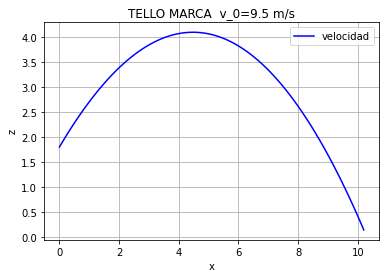

In [19]:
# GRÁFICAS
plt.title("TELLO MARCA VICTOR v_0=9.5 m/s")
plt.ylabel('z')
plt.xlabel('x')
plt.plot(xs1,zs1,'b-',label ='velocidad',markersize=0.5)
plt.legend()
plt.grid()

d) (4p) Modifique el programa de tal manera que se pueda aplicar al caso
cuando además aparece una fuerza horizontal constante $Fv$ $(viento)$ en
favor y en contra del movimiento, igual en valor al $20\%$ del peso del
cuerpo. Repita los pasos del item c). En cuantas veces es mayor o
menor el tiempo de vuelo $t_{favor}$/$t_{encontra}$ para los $2$ casos considerados? 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
#Donde sabemos que: vx = v*cos45 y vz= v*sin45
#Modelo matemático
az1 = lambda vz: g - (k/m)*vz 
ax1 = lambda vx: 0.2 * abs(g) - (k/m)*abs(vx) 
#Condiciones
#z >= 0

def Euler2d1(t,x,z,vx,vz):


################################################################################
  # Definición de las listas con los valores de las variables
  tiempo = [t]
  posicionx = [x]
  posicionz = [z]
  velocidadx = [vx]
  velocidadz = [vz]
  aceleracionx = [ax1(vx)]
  aceleracionz = [az1(vz)]

################################################################################
  h = float(input("Ingrese el paso: "))
  #print("tiempo  posiciónx  posiciónz  velocidadx  velocidadz  aceleraciónx  aceleraciónz")
  while z >= 0:
    tiempo.append(t)
    posicionx.append(x)
    posicionz.append(z)
    velocidadx.append(abs(vx))
    velocidadz.append(vz)
    aceleracionx.append(abs(ax1(vx)))       
    aceleracionz.append(az1(vz))

    #print('{:1.2f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}'.format(t,x,z,vx,vz,ax1(vx),az1(vz)))    
    z = z + h*vz
    vz = vz + h*az(vz)

    x = x + h*vx
    vx = vx + h*ax1(vx)

    t = t + h

  return tiempo,posicionx,posicionz,velocidadx,velocidadz,aceleracionx,aceleracionz

In [ ]:
#Valores
m = 0.4  # masa en kg
g = -9.87
k = 0.02

#Condiciones
t = 0

#PVI z(0)=1.8, v(0) = 0
z = 1.8
vz = 6.25
x = 0
vx = 6.25

In [ ]:
# solucion numerica con euler
ts2,xs2,zs2,vxs2,vzs2,axs2,azs2 = Euler2d1(t,x,z,vx,vz)

#Respondiendo las preguntas y completando la tabla con la energia total
print('la velocidad inicial es de:', np.sqrt(vx**2+vz**2), 'm/s')
print('Segun el cuadro, el tiempo de llegada a la canasta es de:', 1.14, 's' )
print('Alcance máximo es: ', 3.7992 , 'm',' y la energia total:', 25.5551, 'J')
print('=================')

#Energía
EK = np.zeros(len(vxs2))
ET = np.zeros(len(vxs2))
print("Tiempo  Posiciónx  Posiciónz Velocidadx  Velocidadz  Energía T")
for i in range(1,len(vxs2)):
  EK[i] = 0.5*m*(vxs2[i])**2 + 0.5*m*(vzs2[i])**2
  ET[i] = EK[i] + m*abs(g) * zs2[i]
  print('{:0.4f}{:10.4f}{:10.4f}{:12.4f}{:12.4f}{:12.4f}'.format(ts2[i],xs2[i],zs2[i],vxs2[i],vzs2[i],ET[i]))

e) (2p) Modifique el programa desarrolado en el item b) para reemplazar
el algoritmo de $Euler-simple$ por el algoritmo de $Verlet$ en forma de
velocidades.

In [20]:
"""
Algoritmo de Verlet en forma de velocidades
"""
import numpy as np
import matplotlib.pyplot as plt

def verlet_sb(t,fx,fz,x,z,vx,vz,acel1,acel2):
    """
    vt,vv,vz son vectores
    """
    vt =[t]
    vvz = [vz]
    vvx = [vx]
    vx = [x]
    vz = [z]
    ax = [acel1(vx,t)]
    az = [acel2(vz,t)]

    while z>=0:
        print('{:1.2f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}{:12.4f}'.format(t,vz,vx,x,z,acel1(vx,t),acel2(vz,t)))
        z = z + vz*h + 0.5*acel2(vz,t)*h**2   # Verlet
        vtemz = vz + h*acel2(vz,t)    # Euler 
        vz = vz + 0.5*h*(acel2(vz,t)+acel2(vtemz,t))
        
        x = x + vx*h + 0.5*acel1(vx,t)*h**2   # Verlet
        vtemx = vx + h*acel2(vx,t)    # Euler 
        vx = vx + 0.5*h*(acel1(vx,t)+acel1(vtemx,t))
        t = t+h
        
        vt.append(t)
        vvz.append(vz)
        vvx.append(vx)
        vx.append(x)
        vz.append(z)
        ax.append(acel1(vx,t))
        az.append(acel2(vz,t))        

    return (vt,vvz,vvx,vx,vz,ax,az)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# condiciones iniciales
t,vx,vz,z,x = 0,6.71,6.71,1.8,0   
k = 0.02 
m = 0.4
h = 0.02
g = -9.87

# modelo lineal de la dependencia F(v).
acel1 = lambda  vx,t : -(k/m)*np.abs(vx)
fx = lambda vx,t : vx

acel2 = lambda  vz,t : g - (k/m)*vz 
fz = lambda vz,t : vz